

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Detección de Tumores Cerebrales --- Proyecto Modelado Predictivo</p>




# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Librerias Utilizadas</p>

In [ ]:
from IPython.display import clear_output
# !pip install numpy scikit-image seaborn numpy pandas opencv-python matplotlib torch torchvision pathlib scikit-image tqdm keras-tuner

clear_output()

In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from keras.models import load_model
from kerastuner import RandomSearch
from sklearn.metrics import classification_report
import os
import torch
import glob

import pathlib
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")



C:\Users\Mino\AppData\Local\Temp\ipykernel_25984\2812962527.py:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Resumen y objetivos del proyecto</p>

El objetivo principal de este proyecto fue construir un modelo de CNN que clasificaría si el sujeto tiene un tumor o no en base a una resonancia magnética.

La aplicación de técnicas de clasificación automatizadas utilizando Machine Learning(ML) e Inteligencia Artificial(AI) ha mostrado consistentemente precisión más alta que la clasificación manual. Por consiguiente, proponiendo un sistema que realice la detección y clasificación mediante el uso de algoritmos de Deep Learning utilizando Redes Neuronales Convolucionales (CNN), Redes Neuronales Artificiales (ANN) y TransferLearning (TL) sería útil para los médicos de todo el mundo.


##  Descripción del conjunto de datos

Los datos de imagen que se usaron para este problema son [Imágenes de resonancia magnética cerebral para la detección de tumores cerebrales](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri). Consiste en resonancias magnéticas de cuatro clases:

* `no_tumor` 
* `glioma_tumor` 
* `meningioma_tumor` 
* `pituitary_tumor` 

Desafortunadamente, la descripción del conjunto de datos no contiene ninguna información de dónde provienen estas imágenes de resonancia magnética, etc.

##  ¿Qué es un tumor cerebral?

> Un tumor cerebral ocurre cuando se forman células anormales dentro del cerebro. Hay dos tipos principales de tumores: tumores cancerosos (malignos) y tumores benignos. Los tumores cancerosos se pueden dividir en tumores primarios, que comienzan dentro del cerebro, y tumores secundarios, que se han diseminado desde otros lugares, conocidos como tumores de metástasis cerebral. Todos los tipos de tumores cerebrales pueden producir síntomas que varían según la parte del cerebro involucrada. Estos síntomas pueden incluir dolores de cabeza, convulsiones, problemas de visión, vómitos y cambios mentales. El dolor de cabeza suele empeorar por la mañana y desaparece con los vómitos. Otros síntomas pueden incluir dificultad para caminar, hablar o con las sensaciones. A medida que avanza la enfermedad, puede ocurrir pérdida del conocimiento.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg)
>
> *Metástasis cerebral en el hemisferio cerebral derecho de cáncer de pulmón, mostrada en imágenes de resonancia magnética.*

Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Brain_tumor)



# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Construcción de Modelo con Keras</p>



# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Preparación de los datos</p>

In [32]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('C:/Users/Mino/Documents/Proyectos/Brain Tumor/Training/')
path_test = ('C:/Users/Mino/Documents/Proyectos/Brain Tumor/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        train_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
train_img = (np.array(train_img))
# test_img = (np.array(test_img))




In [33]:
X_train, y_train = shuffle(train_img,train_labels, random_state=101)

In [34]:
train_img,test_img,train_labels,test_labels = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [35]:
train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [36]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2611, 300, 300, 3)  and shape of test:  (653, 300, 300, 3)





# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Aumentando los datos</p>

In [24]:

img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(X_train)
img_datagen.fit(X_test)



# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Algunas Visualizaciónes</p>

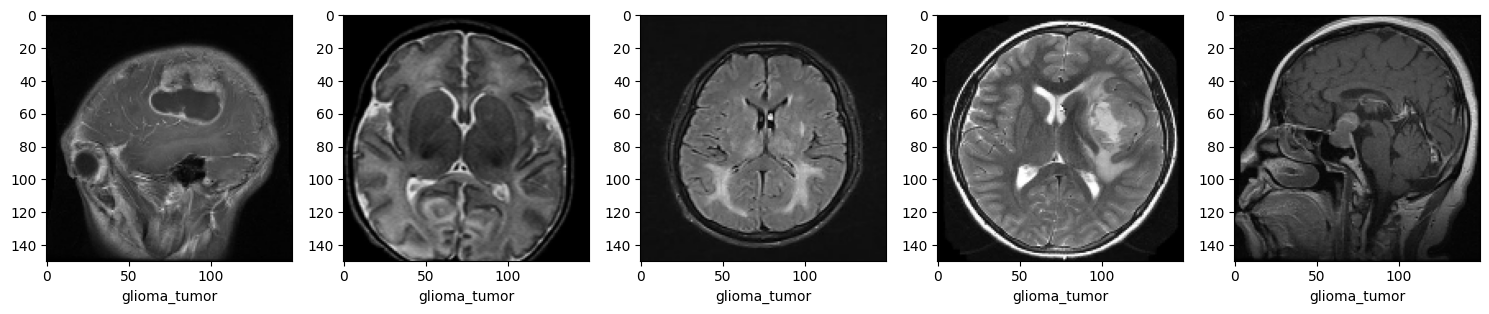

In [25]:
plt.figure(figsize = (15,15));
for i,j in enumerate(X_train):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

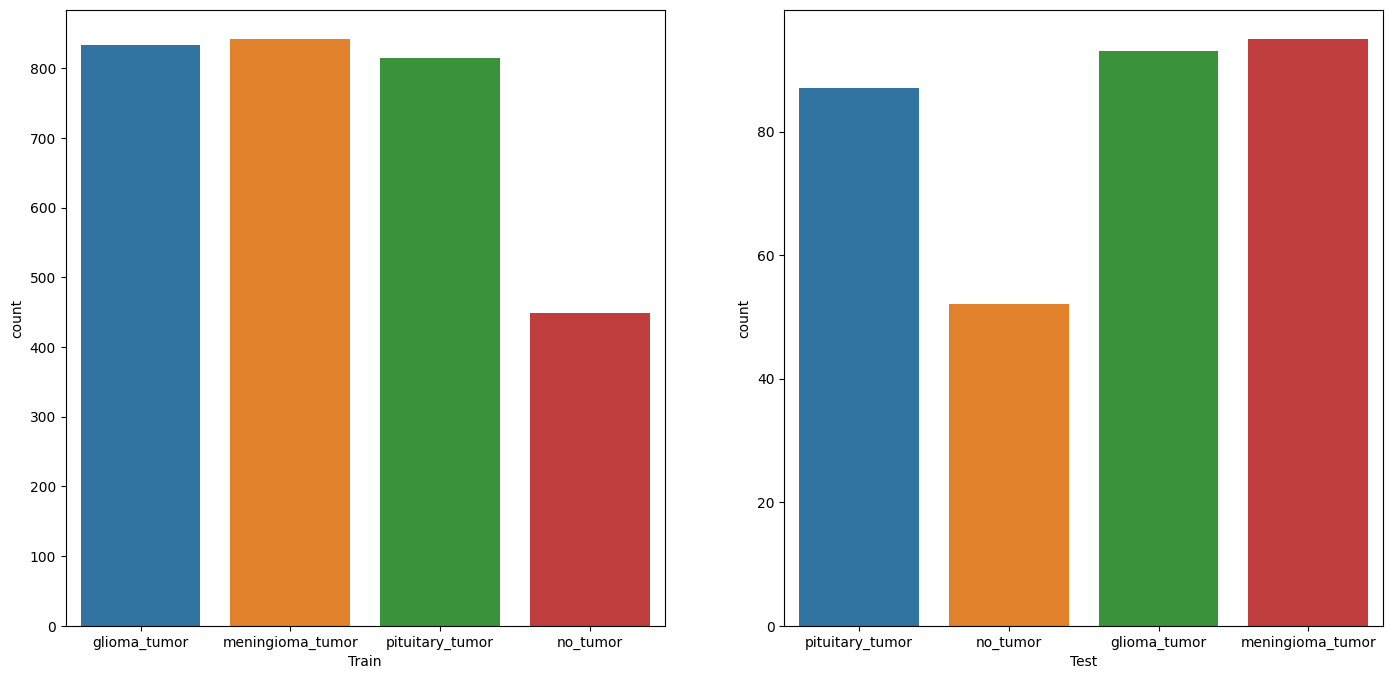

In [31]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
a=sns.color_palette("rocket_r")
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])


In [39]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


In [40]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)),
                    validation_split=0.25, epochs =20, verbose=1, batch_size=32, callbacks=[checkpoint,reduce_lr, tensorboard])

Epoch 1/20
62/62 [==============================] - ETA: 0s - loss: 6.5193 - accuracy: 0.3866
Epoch 1: val_accuracy improved from -inf to 0.41194, saving model to effnet.h5
62/62 [==============================] - 77s 1s/step - loss: 6.5193 - accuracy: 0.3866 - val_loss: 1.2197 - val_accuracy: 0.4119 - lr: 0.0010
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 1.0891 - accuracy: 0.5102
Epoch 2: val_accuracy improved from 0.41194 to 0.62481, saving model to effnet.h5
62/62 [==============================] - 73s 1s/step - loss: 1.0891 - accuracy: 0.5102 - val_loss: 0.9318 - val_accuracy: 0.6248 - lr: 0.0010
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.5470
Epoch 3: val_accuracy improved from 0.62481 to 0.66309, saving model to effnet.h5
62/62 [==============================] - 73s 1s/step - loss: 0.9734 - accuracy: 0.5470 - val_loss: 0.7813 - val_accuracy: 0.6631 - lr: 0.0010
Epoch 4/20
62/62 [==============================]

## <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Algunas Notas</p>
> Agregar relleno aquí para preservar la forma de la imagen

> Agregar la capa maxpool para obtener los píxeles que tienen la mayor intensidad. Reduce el tamaño de la imagen en 2.

> Tomamos filtros de 7*7 como tamaño de imagen si eran de 300 * 300, por lo que ayudaría a aprender mejor.
 
> Tomada una "drop out layer", para evitar el overfitting.

> La imagen del generador de datos es del tipo 'uint8', debe reescribirla en 'float32'.

In [45]:
filename = 'CNN_Brain_Tumor_60_20_20.h5'

In [46]:
model.save(filename)

In [17]:
model_final = load_model(filename)

21/21 [==============================] - 4s 201ms/step - loss: 0.3584 - accuracy: 0.9035
Accuracy: 90.352219


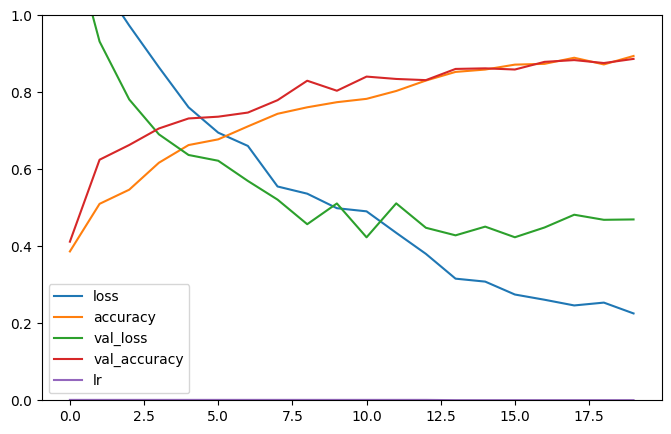

In [41]:
# change directory
#os.chdir(r'../input/brain-tumor-classification-mri')
#print(os.getcwd())

#save the model
#model.save('/kaggle/working/EfficientNetB3.h5')
#model.save_weights('/kaggle/working/EfficientNetB3_weights.h5')

#plot loss and accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
#plt.grid(True)

#plt.gca().set_xlim(0,33)
plt.gca().set_ylim(0,1)
# # plt.savefig('/kaggle/working/EfficientNetB3.png')
loss, accuracy = model.evaluate(tf.cast(test_img, tf.float32), np.array(pd.get_dummies(test_labels)))

# #print accuracy    
print('Accuracy: %f' % (accuracy*100))

In [42]:
lb = LabelEncoder()
labels_train=lb.fit(train_labels)
pred=np.argmax(model.predict(test_img),axis=1)
pred_labels=lb.inverse_transform(pred) #predicted labels
val_y_lab = lb.transform(test_labels)

21/21 [==============================] - 4s 207ms/step


Text(98.2222222222222, 0.5, 'Predicted class')

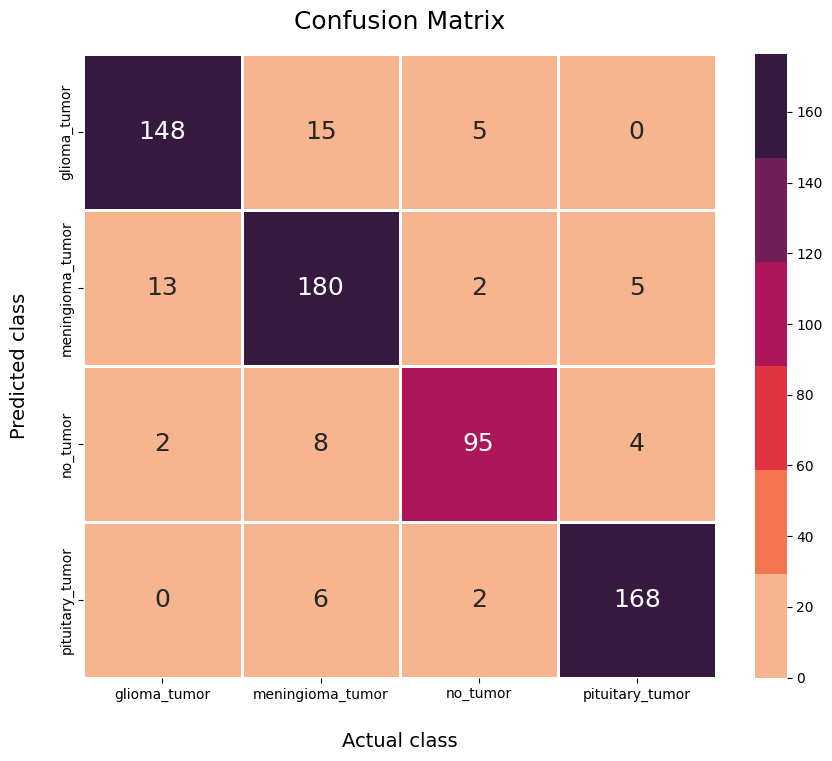

In [43]:
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

cm = confusion_matrix(val_y_lab,pred)

fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("rocket_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
 #annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)
#plt.savefig(os.path.join('plots/','EfficientNetB3_confusion_matrix.png'), dpi=300)

In [44]:
print(classification_report(val_y_lab,pred,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.88      0.89       168
meningioma_tumor       0.86      0.90      0.88       200
        no_tumor       0.91      0.87      0.89       109
 pituitary_tumor       0.95      0.95      0.95       176

        accuracy                           0.91       653
       macro avg       0.91      0.90      0.90       653
    weighted avg       0.91      0.91      0.91       653

